This is a simple regression exmaple to find out if there is a relationship between salinity and temperature of ocean water. This is a CalCOFI( California Cooperative Oceanic Fisheries Investigations) dataset with Over 60 years of oceanographic data, taken from: https://www.kaggle.com/sohier/calcofi?select=bottle.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('bottle.csv')
#print no of rows and columns
nRow,nCol = data.shape
print("No of rows= " ,nRow ,"No of Columns= " , nCol)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


No of rows=  864863 No of Columns=  74


In [3]:
data.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

## Choose the columns to perform regression

In [50]:
ind_y = data.columns.get_loc('Salnty')
ind_x = data.columns.get_loc('T_degC')
print(ind_x,ind_y)

5 6


In [51]:
X= data.iloc[:,ind_x:ind_x+1].values #independent variable as a 2D matrix
y= data.iloc[:,ind_y].values #dependent variable

In [52]:
print(X[:10,:])

[[10.5 ]
 [10.46]
 [10.46]
 [10.45]
 [10.45]
 [10.45]
 [10.45]
 [10.24]
 [10.06]
 [ 9.86]]


## Data Preprocessing

In [53]:
# check for missing data and replace with mean

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

yDash = y.reshape(-1,1)
imputer.fit(yDash)
yDash = imputer.transform(yDash)
y = yDash.ravel()

## Split train and test set 

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

sc2= StandardScaler()
y_train = sc2.fit_transform(y_train.reshape(-1,1)).ravel()
y_test = sc2.transform(y_test.reshape(-1,1)).ravel()

In [56]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 30,random_state= 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=30, random_state=0)

In [58]:
#predict the test data. y_pred contains predicted salaries 
y_pred = regressor.predict(X_test)

In [59]:
#predict training set results for visualisation
yt_pred = regressor.predict(X_train)
print(yt_pred[:10])

[-0.5  -0.16 -0.87  0.68  0.81  0.18  0.63  0.93 -0.37 -0.92]


In [60]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.47703523999270947

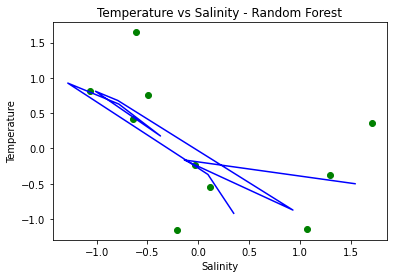

In [61]:
#create a scatter plot of test data
plt.scatter(X_test[:10],y_test[:10],color='green')

#plot the line of best fit/ regression line 
#X_train is used to create the regression line and we want to compare our test results with that. 
plt.plot(X_train[:10],yt_pred[:10],color='blue')

#give the plot a title
plt.title('Temperature vs Salinity - Random Forest')

#add labels to axes
plt.xlabel("Salinity")
plt.ylabel("Temperature")
plt.show()